In [1]:
import numpy as np
import matplotlib.pyplot as plt

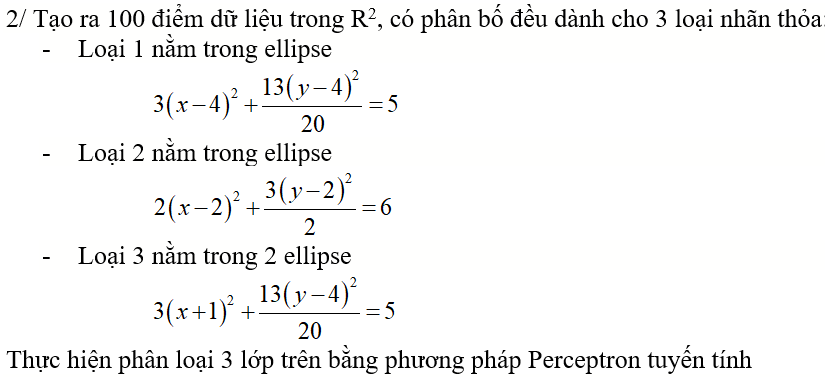

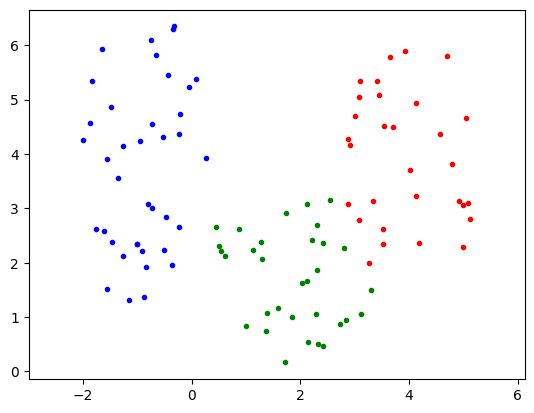

In [ ]:
plt.figure()
plt.axis('equal')

points =[]
labels = []

i = 0
while i < 100:
    x = np.random.random(1)*10-2
    y = np.random.random(1)*10-2

    #Loại 1
    if 3*(x-4)**2 + 13/20*(y-4)**2 < 5: 
        points.append((x,y))
        labels.append(0)
        i+=1
        plt.plot(x,y, 'r.')

    #Loại 2
    elif 2*(x-2)**2 + 3/2*(y-2)**2 <6:
        points.append((x,y))
        labels.append(1)
        i+=1
        plt.plot(x,y, 'g.')

    #Loại 3
    elif 3*(x+1)**2 + 13/20*(y-4)**2 <5:
        points.append((x,y))
        labels.append(2)
        i+=1
        plt.plot(x,y, 'b.')
    else: continue
    

In [ ]:
points = np.array(points).squeeze()  # Loại bỏ các chiều có kích thước bằng 1
labels = np.array(labels)

W = np.array([[0,-1,0], 
              [1, 1, 0], 
              [0, 1,0]]) 
              
def perceptron_multi(X,W):
    X=np.array([X])
    X=X.T
    xx = np.vstack((X, np.array([[1]]))) # thêm số 1 vào cột cuối hay còn gọi là bias để đường tuyến tính xa rời gốc toạ độ
    y=W @ xx  
    return y

epoch = 3
count = 0
for _ in range(epoch):
    for i in np.arange(points.shape[0]):
        out = perceptron_multi(points[i],W) # Tính toán đầu ra
        xx = np.vstack((np.array([points[i]]).T, np.array([[1]]))) # thêm số 1 vào cột cuối
        flag = 'D'

        if np.argmax(out) != labels[i]:
            flag = 'S'
            W[labels[i]] = W[labels[i]]+ xx.T

            for k in range(W.shape[0]):
                if out[k] == max(out):
                    W[k] =W[k]- xx.T

        print(W[0], W[1], W[2], '[X', i+1, 'L', labels[i]+1,']', xx.T[0], out.T, flag)

        if flag =='D': count = count +1
        else: count = 0
        if count == 100: break
    if count == 100: break

[3 3 1] [-2 -3 -1] [0 1 0] [X 1 L 1 ] [3.7113024 4.4910345 1.       ] [[-4.4910345   8.20233691  4.4910345 ]] S
[ 3 -1  0] [-2 -3 -1] [0 5 1] [X 2 L 3 ] [-0.2271221   4.36783844  1.        ] [[ 13.42214903 -13.64927113   4.36783844]] S
[ 3 -1  0] [0 0 0] [-1  2  0] [X 3 L 2 ] [1.14045074 2.22735125 1.        ] [[ 1.19400098 -9.96295525 12.13675627]] S
[ 3 -1  0] [0 0 0] [-1  2  0] [X 4 L 1 ] [4.78407186 3.81832422 1.        ] [[10.53389135  0.          2.85257659]] D
[ 3 -1  0] [0 0 0] [-1  2  0] [X 5 L 3 ] [-1.83847212  5.34661229  1.        ] [[-10.86202864   0.          12.5316967 ]] D
[ 3 -1  0] [0 2 1] [-1  0 -1] [X 6 L 2 ] [0.49755222 2.29993467 1.        ] [[-0.807278    0.          4.10231712]] S
[ 3 -1  0] [ 0 -2  0] [-1  4  0] [X 7 L 3 ] [-0.53210623  4.31322271  1.        ] [[-5.90954139  9.62644542 -0.46789377]] S
[8 3 1] [ 0 -2  0] [-6  0 -1] [X 8 L 1 ] [5.04257124 4.65645973 1.        ] [[10.47125397 -9.31291947 13.5832677 ]] S
[8 3 1] [ 0 -2  0] [-6  0 -1] [X 9 L 1 ] [3.

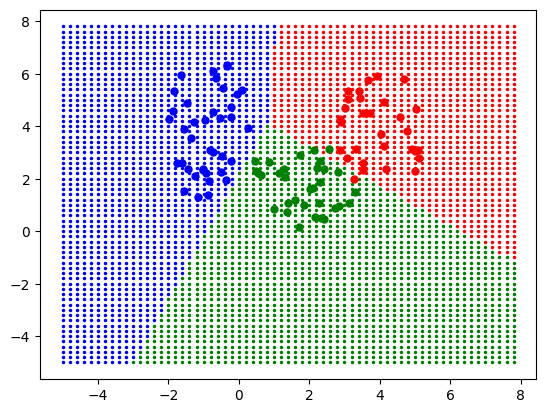

In [25]:
# VẼ ĐỒ THỊ PHÂN LOẠI 2D
color = 'rgb'
plt.figure()

for x1 in np.arange(-5, 8, 0.2):
    for x2 in np.arange(-5,8, 0.2):
        x = np.array([x1, x2])
        out = perceptron_multi(x, W)  # Tính toán đầu ra
        label = np.argmax(out)  # Nhãn dự đoán
        plt.plot(x1,x2,color[label]+'.',markersize=3)  # Vẽ điểm dự đoán

for i in range(points.shape[0]):
    plt.plot(points[i,0], points[i,1], color[labels[i]]+'.',markersize = 10) # Vẽ các điểm huấn luyện


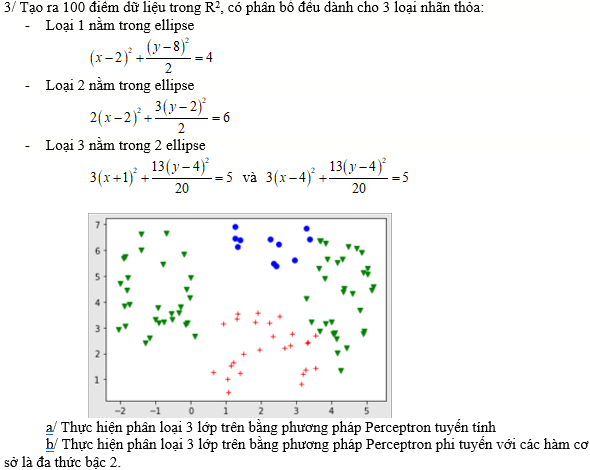

AttributeError: 'numpy.ndarray' object has no attribute 'append'

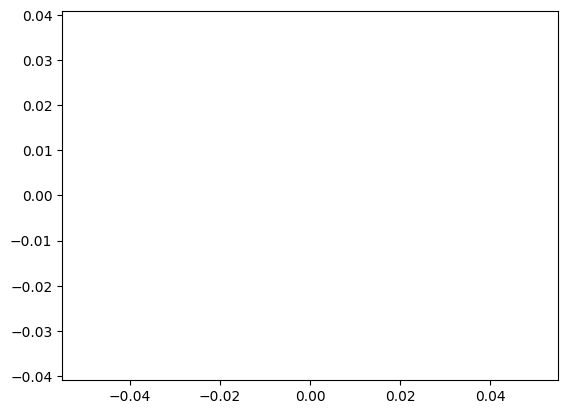

In [28]:
plt.figure()
plt.axis('equal')

x =[]
y = []

i = 0
max = 0
while i < 100 and max<1000:
    x = np.random.random(1)*10-2
    y = np.random.random(1)*10-2

    #Loại 1
    if (x-2)**2 + 0.5*(y-8)**2 < 4: 
        x.append((x,y))
        y.append(0)
        i+=1
        plt.plot(x,y, 'r.')

    #Loại 2
    elif 2*(x-2)**2 + 3/2*(y-2)**2 <6:
        x.append((x,y))
        y.append(1)
        i+=1
        plt.plot(x,y, 'g.')

    #Loại 3
    elif 3*(x+1)**2 + 13/20*(y-4)**2 <5 or 3*(x-4)**2+13/20*(y-4)**2 < 5:
        x.append((x,y))
        y.append(2)
        i+=1
        plt.plot(x,y, 'b.')
    else: continue
    max+=1